# Binary Sentiment Analysis using Classical Machine Learning algorithms

Here we use algorithms like:

1. Bag of Words + Logistic Regression
2. Bag of Words + Multinomial Naive Bayes

In [457]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import mglearn

import pandas as pd
import numpy as np
import re
import math

In [220]:
df = pd.read_csv('movie_data.csv')

In [221]:
df.head(5)

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [222]:
df.loc[20, 'review'][-300:]

'e most part. If it were not for Zucco and Strange\'s presence, along with the cute Anne Nagel, this would be completely unwatchable. Strange, who would go on to play Frankenstein\'s monster for Unuiversal in two years, does a Lenny impression from "Of Mice and Men", it seems.<br /><br />*1/2 (of Four)'

In [223]:
def preprocessor(text):
    text = re.sub('<[^>]*>', ' ', text)
    text = re.sub('[\W]+', ' ', text.lower())
    return text

In [224]:
#test
preprocessor(df.loc[20, 'review'][-300:])

'e most part if it were not for zucco and strange s presence along with the cute anne nagel this would be completely unwatchable strange who would go on to play frankenstein s monster for unuiversal in two years does a lenny impression from of mice and men it seems 1 2 of four '

In [225]:
#apply preprocessor to all reviews
df['review'] = df['review'].apply(preprocessor)

# Logistic Regression

In [226]:
train_fraction = 0.5
train_index = math.floor(df.shape[0]*train_fraction)

train_data = df.loc[:train_index, 'review'].values
train_label = df.loc[:train_index, 'sentiment'].values
test_data = df.loc[train_index:, 'review'].values
test_label = df.loc[train_index:, 'sentiment'].values

YTrain = train_label
YTest = test_label

In [227]:
train_data[-1]

'for a scientifically engineered super dog that was supposed to be the answer to petit crime chomps was a chump all i ever saw chomps do was sit or walk or run or run then walk then sit and then get back up again and stretch and then walk and then jog to k tel dance hits and sometimes it had all the answers to the daily jumbo but mostly it just sat a lot all i am saying is in a celebrity death match chomps couldn t take out mr bigglesworth '

In [228]:
test_data[0]

'for a scientifically engineered super dog that was supposed to be the answer to petit crime chomps was a chump all i ever saw chomps do was sit or walk or run or run then walk then sit and then get back up again and stretch and then walk and then jog to k tel dance hits and sometimes it had all the answers to the daily jumbo but mostly it just sat a lot all i am saying is in a celebrity death match chomps couldn t take out mr bigglesworth '

## Vectorize into bag of words

In [518]:
vect = CountVectorizer(min_df=2, ngram_range=(1, 3))
XTrain = vect.fit(train_data).transform(train_data)
XTest = vect.transform(test_data)

In [519]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("XTrain : \n{}".format(repr(XTrain)))
print("XTest : \n{}".format(repr(XTest)))
print("Features : {}".format(len(vect.get_feature_names())))

Vocabulary size: 877673
XTrain : 
<25001x877673 sparse matrix of type '<class 'numpy.int64'>'
	with 9747995 stored elements in Compressed Sparse Row format>
XTest : 
<25000x877673 sparse matrix of type '<class 'numpy.int64'>'
	with 8918241 stored elements in Compressed Sparse Row format>
Features : 877673


## Logistic regression with parameter tuning

In [520]:
parameter_grid = {'C': [0.05, 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(LogisticRegression(), parameter_grid, cv = 5)
grid.fit(XTrain, YTrain)

/Users/97amarnathk/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.05, 0.1, 0.2, 0.5, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [521]:
print("Best cross-validation score: {}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.8956041758329667
Best parameters:  {'C': 0.2}
Best estimator:  LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


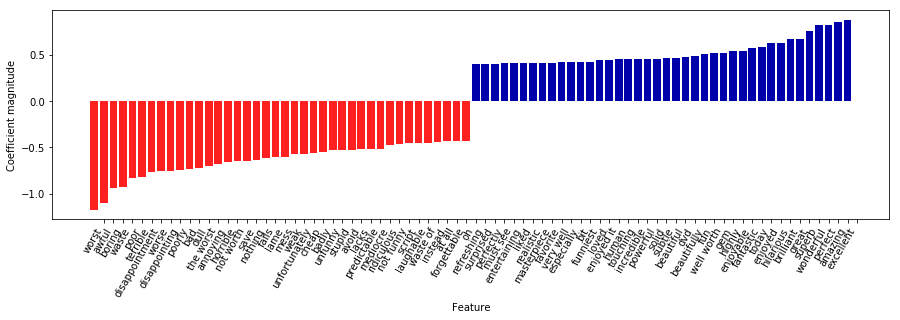

In [522]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, vect.get_feature_names(), n_top_features=40)
plt.savefig('logistic_1.png', format="png", dpi=300)

In [523]:
lr = grid.best_estimator_
lr.fit(XTrain, YTrain)

/Users/97amarnathk/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [524]:
lr.predict(XTest)
print("Score: {}".format(lr.score(XTest, YTest)))

Score: 0.90492


In [525]:
ypred = lr.predict(XTest)
tn, fp, fn, tp = confusion_matrix(YTest, ypred).ravel()
print(tn, fp, fn, tp)

11282 1245 1132 11341


# Logistic Regression with stopwords removed

In [241]:
df_stop = df.copy()

In [566]:
stop_words = set(stopwords.words('english'))

required = {
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'any',
 'are',
 'aren',
 "aren't",
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'can',
 'couldn',
 "couldn't",
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'each',
 'few',
 'for',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'how',
 'is',
 'isn',
 "isn't",
 'just',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 'shan',
 "shan't",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'some',
 'such',
 'than',
 'that',
 "that'll",
 'their',
 'theirs',
 'then',
 'there',
 'these',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 'wasn',
 "wasn't",
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'
}

stop_words = set(stopwords.words('english'))

In [567]:
print(stop_words)
def remove_stopwords(text):
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [w for w in tokens if not w in stop_words]
    text = " ".join(tokens)
    return text

{'ourselves', "you're", 'before', 'weren', 'hasn', "wasn't", 'mightn', 'there', "hasn't", "weren't", 'and', "mightn't", 'same', 'does', 'ma', 'yourself', 'that', 've', 'theirs', 'while', 'hadn', "didn't", 'where', 'now', 'his', 'so', "shan't", 'the', 'themselves', 'but', 'through', 'both', 'shan', 'him', 'a', 'for', "haven't", 'should', 'their', 'was', 'about', 'then', 'those', 'why', 's', 'me', 'll', "don't", 'he', 'itself', 'down', 'between', 'wasn', 'haven', 'doing', 'into', 'our', 'all', 'having', 'you', 'being', 'only', 'than', 'i', 'd', "she's", 'this', 'your', 'nor', 'here', 'off', 'each', 'these', 'once', 'or', 'am', 'isn', 'few', "wouldn't", 'be', 'who', 'will', 'we', 'shouldn', "it's", 'won', 'up', 'had', 'in', 'needn', 'didn', 'by', 'during', 'm', 'she', "doesn't", 'it', "aren't", 'her', 'against', 'some', 'until', 'are', 'above', "mustn't", 'on', 'ain', 'other', 'just', 'because', "couldn't", 'doesn', 'hers', 'own', 'to', 'were', 'did', "isn't", 'over', 'wouldn', 'of', 'ver

In [568]:
df_stop['review'] = df_stop['review'].apply(remove_stopwords)

In [569]:
train_fraction = 0.5
train_index = math.floor(df_stop.shape[0]*train_fraction)

train_data_stop = df_stop.loc[:train_index, 'review'].values
train_label_stop = df_stop.loc[:train_index, 'sentiment'].values
test_data_stop = df_stop.loc[train_index:, 'review'].values
test_label_stop = df_stop.loc[train_index:, 'sentiment'].values

YTrain = train_label_stop
YTest = test_label_stop

In [570]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2))
XTrain = vect.fit(train_data_stop).transform(train_data_stop)
XTest = vect.transform(test_data_stop)

In [571]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("XTrain : \n{}".format(repr(XTrain)))
print("XTest : \n{}".format(repr(XTest)))
print("Features : {}".format(len(vect.get_feature_names())))

Vocabulary size: 89228
XTrain : 
<25001x89228 sparse matrix of type '<class 'numpy.int64'>'
	with 3202393 stored elements in Compressed Sparse Row format>
XTest : 
<25000x89228 sparse matrix of type '<class 'numpy.int64'>'
	with 3111489 stored elements in Compressed Sparse Row format>
Features : 89228


In [572]:
parameter_grid = {'C': [ 0.9, 1, 1.1, 1.2]}
grid = GridSearchCV(LogisticRegression(max_iter = 200), parameter_grid, cv = 5)
grid.fit(XTrain, YTrain)

/Users/97amarnathk/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.9, 1, 1.1, 1.2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [573]:
print("Best cross-validation score: {}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.8868045278188872
Best parameters:  {'C': 0.9}
Best estimator:  LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


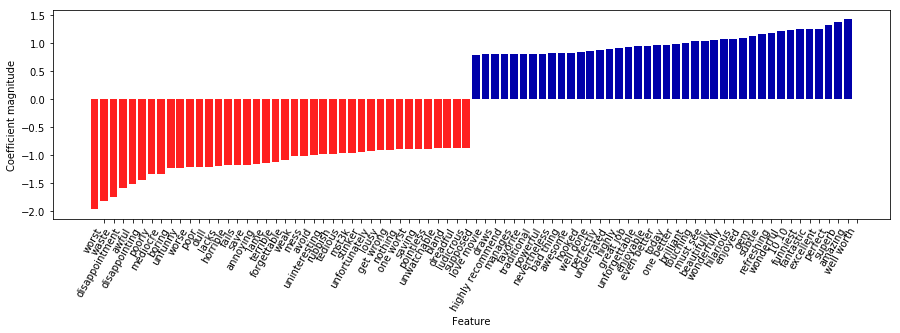

In [574]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, vect.get_feature_names(), n_top_features=40)


In [575]:
lr = grid.best_estimator_
lr.fit(XTrain, YTrain)

/Users/97amarnathk/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [576]:
lr.predict(XTest)
print("Score: {}".format(lr.score(XTest, YTest)))

Score: 0.8912


In [577]:
ypred = lr.predict(XTest)
tn, fp, fn, tp = confusion_matrix(YTest, ypred).ravel()
print(tn, fp, fn, tp)

11134 1393 1327 11146


## TF-IDF  + Logistic Regression

In [557]:
train_fraction = 0.5
train_index = math.floor(df.shape[0]*train_fraction)

train_data = df.loc[:train_index, 'review'].values
train_label = df.loc[:train_index, 'sentiment'].values
test_data = df.loc[train_index:, 'review'].values
test_label = df.loc[train_index:, 'sentiment'].values

YTrain = train_label
YTest = test_label

In [558]:
vect = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=5, sublinear_tf=True)
XTrain = vect.fit(train_data).transform(train_data)
XTest = vect.transform(test_data)

In [559]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("XTrain : \n{}".format(repr(XTrain)))
print("XTest : \n{}".format(repr(XTest)))
print("Features : {}".format(len(vect.get_feature_names())))

Vocabulary size: 246690
XTrain : 
<25001x246690 sparse matrix of type '<class 'numpy.float64'>'
	with 8069433 stored elements in Compressed Sparse Row format>
XTest : 
<25000x246690 sparse matrix of type '<class 'numpy.float64'>'
	with 7825522 stored elements in Compressed Sparse Row format>
Features : 246690


In [560]:
parameter_grid = {'C': [7.9,8,8.25]}
grid = GridSearchCV(LogisticRegression(max_iter = 300), parameter_grid, cv = 5)
grid.fit(XTrain, YTrain)
print("Best cross-validation score: {}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

/Users/97amarnathk/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.9058037678492861
Best parameters:  {'C': 7.9}
Best estimator:  LogisticRegression(C=7.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


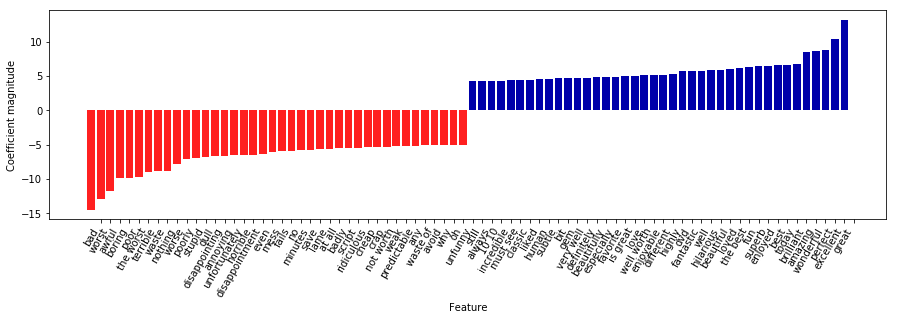

In [561]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, vect.get_feature_names(), n_top_features=40)

In [562]:
lr = grid.best_estimator_
lr.fit(XTrain, YTrain)

/Users/97amarnathk/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=7.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [563]:
lr.predict(XTest)
print("Score: {}".format(lr.score(XTest, YTest)))

Score: 0.91404


In [565]:
ypred = lr.predict(XTest)
tn, fp, fn, tp = confusion_matrix(YTest, ypred).ravel()
print(tn, fp, fn, tp)

11402 1125 1024 11449


## Multinomial Naive Bayes

In [547]:
train_fraction = 0.5
train_index = math.floor(df.shape[0]*train_fraction)

train_data = df.loc[:train_index, 'review'].values
train_label = df.loc[:train_index, 'sentiment'].values
test_data = df.loc[train_index:, 'review'].values
test_label = df.loc[train_index:, 'sentiment'].values

YTrain = train_label
YTest = test_label

In [548]:
vect = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=1, sublinear_tf=True)
XTrain = vect.fit(train_data).transform(train_data)
XTest = vect.transform(test_data)

In [554]:
parameter_grid = {'alpha': [ 0.08, 0.09 ,0.1, 0.12]}

grid = GridSearchCV(MultinomialNB(), parameter_grid, cv = 5)
grid.fit(XTrain, YTrain)
print("Best cross-validation score: {}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.8985640574377025
Best parameters:  {'alpha': 0.08}
Best estimator:  MultinomialNB(alpha=0.08, class_prior=None, fit_prior=True)


In [555]:
mnb = grid.best_estimator_
mnb.fit(XTrain, YTrain)

MultinomialNB(alpha=0.08, class_prior=None, fit_prior=True)

In [556]:
mnb.predict(XTest)
print("Score: {}".format(mnb.score(XTest, YTest)))

Score: 0.90488
